In [101]:
"""
로드맵
1.동대문구 사고다발 구역 pandas 지도 모듈 사용해서 위치 데이터 가공후 나타내기
2.유의미한col들로 insight도출
3.노인보호구역 지정 유력 - 근거찾아서 지정
4.기존 노인보호구역 제외해서
다시 지정
5.시각화
"""

'\n로드맵\n1.동대문구 사고다발 구역 pandas 지도 모듈 사용해서 위치 데이터 가공후 나타내기\n2.유의미한col들로 insight도출\n3.노인보호구역 지정 유력 - 근거찾아서 지정\n4.기존 노인보호구역 제외해서\n다시 지정\n5.시각화 \n'

In [134]:
#pandas 불러오기, 데이터확인
import pandas as pd
accident= pd.read_csv('/content/accidentInfo.csv')
accident


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010300100194,2019년 1월 3일 12시,목요일,서울특별시 동대문구 장안동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,이륜,남,26세,상해없음,보행자,여,69세,중상
1,2019010300100251,2019년 1월 3일 14시,목요일,서울특별시 동대문구 답십리동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,80세,중상
2,2019010500100163,2019년 1월 5일 10시,토요일,서울특별시 동대문구 제기동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,교차로 - 교차로안,화물,남,34세,상해없음,보행자,여,76세,중상
3,2019010500100164,2019년 1월 5일 10시,토요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,개인형이동수단(PM),남,26세,상해없음,보행자,남,78세,경상
4,2019010500100293,2019년 1월 5일 15시,토요일,서울특별시 동대문구 제기동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,화물,여,35세,상해없음,보행자,남,85세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2021121600100134,2021년 12월 16일 10시,목요일,서울특별시 동대문구 이문동,경상사고,0,0,1,0,차대사람 - 보도통행중,...,맑음,단일로 - 기타,화물,남,62세,상해없음,보행자,여,85세,경상
369,2021121700100205,2021년 12월 17일 12시,금요일,서울특별시 동대문구 신설동,중상사고,0,1,0,0,차대사람 - 기타,...,맑음,단일로 - 기타,승합,남,66세,상해없음,보행자,남,72세,중상
370,2021122300100022,2021년 12월 23일 06시,목요일,서울특별시 동대문구 용두동,경상사고,0,0,1,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,화물,남,56세,상해없음,보행자,여,67세,경상
371,2021123000100135,2021년 12월 30일 11시,목요일,서울특별시 동대문구 장안동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승합,남,55세,상해없음,보행자,남,69세,경상


In [135]:
#데이터 분석
#사고건수 컬럼 새로 만들기 (사망자수+중상자수+경상자수+부상신고자수)=사고건수
accident['사고건수']= accident['사망자수']+ accident['중상자수']+accident['경상자수']+ accident['부상신고자수']
accident
#확인결과 각각의 데이터 유형 당 사고건수 1개 존재함을 알 수 있음
#시군구 별로 groupby를 통해 시군구별 사고건수 파악
accident_count=accident.groupby('시군구').agg({'사고건수':'sum'})
#내림차순 정렬
accident_count_sort=accident_count['사고건수'].sort_values(ascending=False)
#top3추출
accident_count_sort.head(3)

시군구
서울특별시 동대문구 제기동    90
서울특별시 동대문구 장안동    75
서울특별시 동대문구 용두동    56
Name: 사고건수, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*a

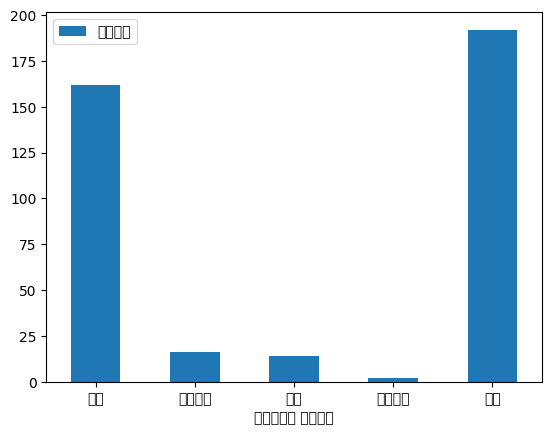

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

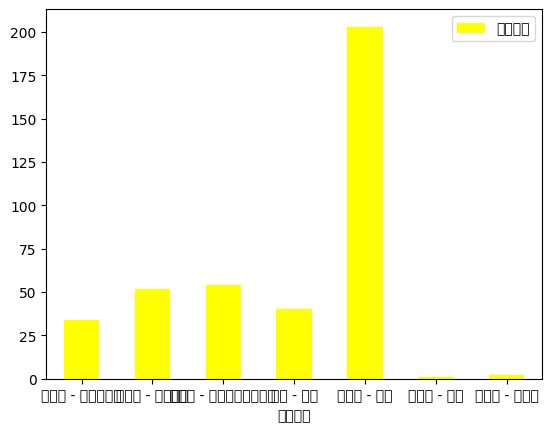

In [147]:
#한글폰트조정######
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

#1.사고건수 별 피해상해정도 분석
accident.groupby('피해운전자 상해정도').agg({'사고건수':'sum'})
accident.groupby('피해운전자 상해정도').agg({'사고건수':'sum'}).plot.bar(rot=0)
#2.사고건수 별 도로형태 분석
load=accident.groupby('도로형태').agg({'사고건수':'sum'})
load=accident.groupby('도로형태').agg({'사고건수':'sum'}).plot.bar(rot=0, color='yellow')

In [149]:
#도로 종류 지정 : 단일로-기타 경로(203)건수가  압도적으로 높음=> 도로유형 고려하여 지정
load=accident.groupby('도로형태').agg({'사고건수':'sum'})
load

,사고건수
도로형태,
교차로 - 교차로부근,34
교차로 - 교차로안,52
교차로 - 교차로횡단보도내,54
기타 - 기타,40
단일로 - 기타,203
단일로 - 터널,1
주차장 - 주차장,2


In [150]:
#기존 노인보호구역 제외한 새로운 구역을 지정
#보호구역 지정할 지역 설정
#경향성 살펴보기

#1. 서울특별시 동대문구 용두동 (19)/ 2.서울특별시 동대문구 장안동 (15)/ 3. 서울특별시 동대문구 답십리동 (13)
first_loc=accident[accident['시군구']=='서울특별시 동대문구 제기동']
first_loc['도로형태'].value_counts()
# 결과출력결과[상위값] :단일로 - 기타: 54


second_loc=accident[accident['시군구']=='서울특별시 동대문구 장안동']
second_loc['도로형태'].value_counts()
# 결과출력결과: 단일로 - 기타: 26

third_loc=accident[accident['시군구']=='서울특별시 동대문구 용두동']
third_loc['도로형태'].value_counts()
# 결과출력결과: 단일로 - 기타: 26


단일로 - 기타          26
교차로 - 교차로횡단보도내    10
교차로 - 교차로안         8
교차로 - 교차로부근        5
기타 - 기타            5
단일로 - 터널           1
Name: 도로형태, dtype: int64

In [157]:
#first_location의 상세 데이터 정보[동대문구 제기동 - 도로유형[단일로 - 기타]]
first_loc[accident['도로형태']== '단일로 - 기타']
search=first_loc[['사고번호','사고일시']]
#사고번호 사고일시로 위도 경도 찾기

#위도랑 매칭 시켜서 지도에 시각화




<ipython-input-157-24c296215566>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_loc[accident['도로형태']== '단일로 - 기타']


,사고번호,사고일시
2,2019010500100163,2019년 1월 5일 10시
4,2019010500100293,2019년 1월 5일 15시
5,2019010700100046,2019년 1월 7일 05시
7,2019010800100163,2019년 1월 8일 10시
8,2019011000100422,2019년 1월 10일 19시
...,...,...
345,2021101200100047,2021년 10월 12일 07시
346,2021101900100100,2021년 10월 19일 09시
347,2021102200100234,2021년 10월 22일 12시
366,2021121000100351,2021년 12월 10일 16시


In [ ]:
#위도 불러오기

In [96]:
#기존 보호구역 지도시각화
#파일 불러오기
safezone= pd.read_csv('/content/서울특별시_동대문구_노인장애인보호구역_20230828.csv',encoding='cp949')

In [97]:
import pandas as pd
import folium

# 데이터를 Pandas DataFrame으로 변환
data = {
    '대상시설명': ['동대문노인종합복지관', '중산경노당', '행복마을경노당', '사)대한노인회', '장평경노당', '경동요양병원', '은천노인종합복지센터', '시립동대문실버케어센터'],
    '위도': [37.58723704, 37.57035699, 37.59000925, 37.57637482, 37.57325201, 37.58294153, 37.570683, 37.575637],
    '경도': [127.0500258, 127.0576174, 127.0387016, 127.0563417, 127.0684601, 127.0437706, 127.0722082, 127.044825]
}

df = pd.DataFrame(data)

# 서울을 중심으로 하는 Folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# DataFrame의 각 행을 반복하여 마커 추가
for index, row in df.iterrows():
    folium.Marker([row['위도'], row['경도']], popup=row['대상시설명']).add_to(m)

# HTML 파일로 저장
m.save('map_with_markers.html')


In [ ]:
#찾은 위치와 지정된 위치 비교하여 선정